<a href="https://colab.research.google.com/github/151ali/lr-pytorch/blob/main/5_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

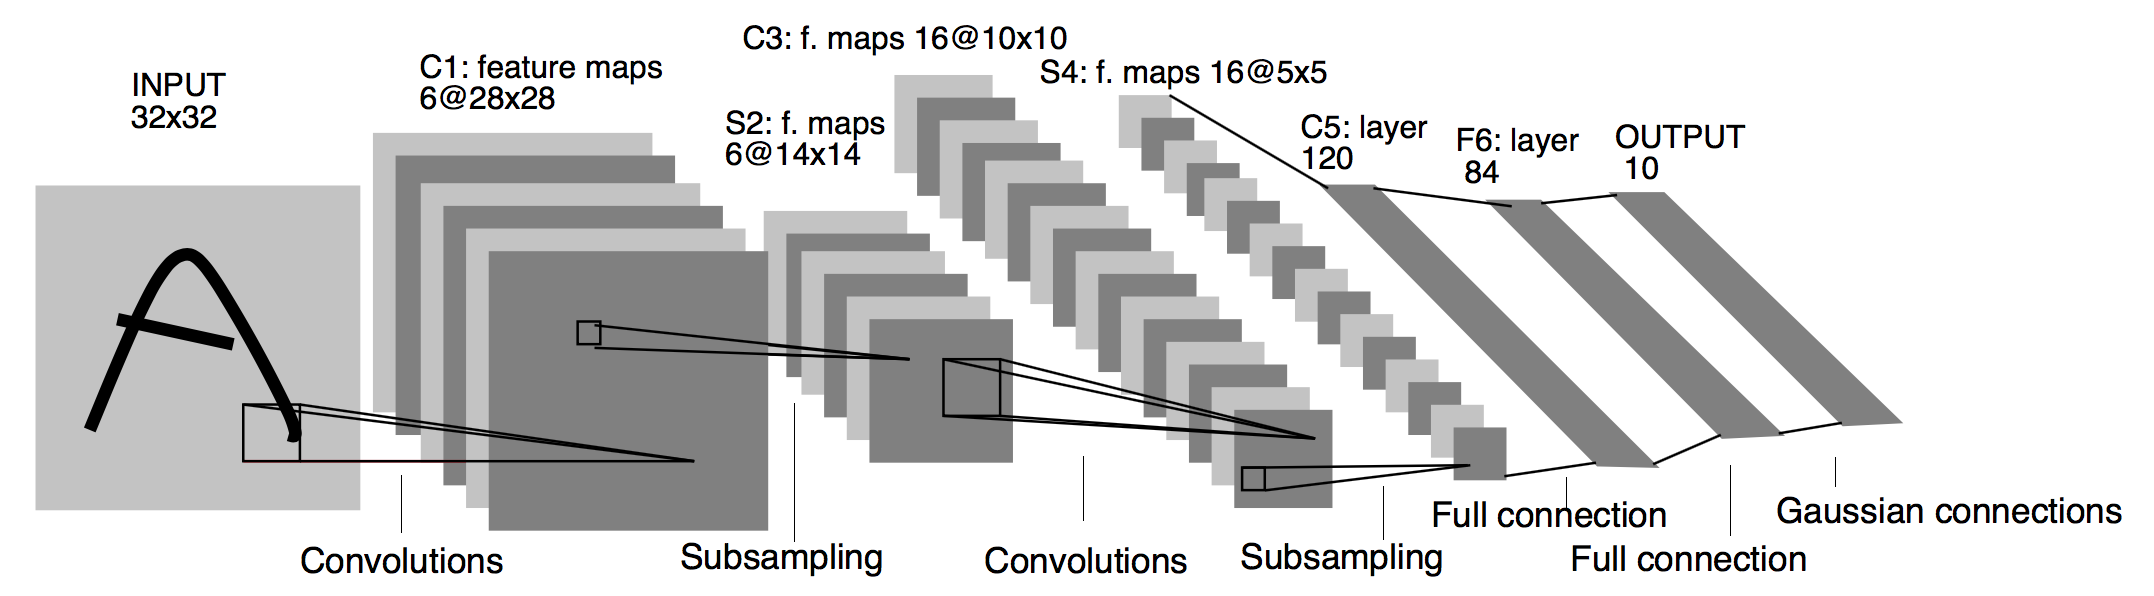

In [42]:
import torch.nn as nn
import torch.nn.functional as F

In [86]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()

    self.pool = nn.AvgPool2d(kernel_size=(2, 2), stride=(2,2))
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),stride=(1,1),padding=(0,0))
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),stride=(1,1),padding=(0,0))    
    self.conv3 = nn.Conv2d(in_channels=16,out_channels=120,kernel_size=(5,5),stride=(1,1),padding=(0,0))
    self.fc1 = nn.Linear(120, 84)
    self.fc2 = nn.Linear(84, 10)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    print(x.shape)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    return x

In [87]:
x = torch.randn(1, 1, 32, 32)
model = LeNet()

In [88]:
model(x)

torch.Size([1, 120])


tensor([[0.0318, 0.0000, 0.0000, 0.0000, 0.1055, 0.0000, 0.0816, 0.0621, 0.0000,
         0.0811]], grad_fn=<ReluBackward0>)

In [64]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [67]:
net(torch.randn(1, 3, 32, 32))

tensor([[ 0.0764, -0.0857, -0.1150,  0.1321,  0.0852, -0.0082, -0.0881, -0.0934,
         -0.0455,  0.1533]], grad_fn=<AddmmBackward>)